In [1]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./data/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,17.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,35.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,29.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,29.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,24.0,3449.0,10.5,70.0,1,ford torino


In [3]:
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,17.0,3504.0
1,15.0,8,35.0,3693.0
2,18.0,8,29.0,3436.0
3,16.0,8,29.0,3433.0
4,17.0,8,24.0,3449.0


In [12]:
X = ndf[['weight']]
y = ndf['mpg']

In [13]:
X.shape

(398, 1)

In [14]:
# train data, test data 구분

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape

(278, 1)

#### 모델링

In [16]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2)  # 차수 : 2차항

In [17]:
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[1.0000000e+00, 4.4400000e+03, 1.9713600e+07],
       [1.0000000e+00, 2.4010000e+03, 5.7648010e+06],
       [1.0000000e+00, 2.5870000e+03, 6.6925690e+06],
       [1.0000000e+00, 3.1550000e+03, 9.9540250e+06],
       [1.0000000e+00, 2.6480000e+03, 7.0119040e+06],
       [1.0000000e+00, 2.9000000e+03, 8.4100000e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06],
       [1.0000000e+00, 2.9500000e+03, 8.7025000e+06],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.6350000e+03, 6.9432250e+06],
       [1.0000000e+00, 1.9680000e+03, 3.8730240e+06],
       [1.0000000e+00, 2.0030000e+03, 4.0120090e+06],
       [1.0000000e+00, 2.1100000e+03, 4.4521000e+06],
       [1.0000000e+00, 3.2110000e+03, 1.0310521e+07],
       [1.0000000e+00, 2.5820000e+03, 6.6667240e+06],
       [1.0000000e+00, 3.3530000e+03, 1.1242609e+07],
       [1.0000000e+00, 3.1930000e+03, 1.0195249e+07],
       [1.0000000e+00, 1.7600000e+03, 3.0976000e+06],
       [1.0000000e+00, 2.051

In [18]:
X_train_poly.shape

(278, 3)

In [19]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
X_test_poly = poly.fit_transform(X_test)  # 평가는 test data로
X_test_poly

array([[1.0000000e+00, 1.7950000e+03, 3.2220250e+06],
       [1.0000000e+00, 2.6250000e+03, 6.8906250e+06],
       [1.0000000e+00, 2.6340000e+03, 6.9379560e+06],
       [1.0000000e+00, 3.9400000e+03, 1.5523600e+07],
       [1.0000000e+00, 4.2370000e+03, 1.7952169e+07],
       [1.0000000e+00, 2.1000000e+03, 4.4100000e+06],
       [1.0000000e+00, 2.8650000e+03, 8.2082250e+06],
       [1.0000000e+00, 4.7350000e+03, 2.2420225e+07],
       [1.0000000e+00, 4.0600000e+03, 1.6483600e+07],
       [1.0000000e+00, 2.8750000e+03, 8.2656250e+06],
       [1.0000000e+00, 3.8500000e+03, 1.4822500e+07],
       [1.0000000e+00, 1.9650000e+03, 3.8612250e+06],
       [1.0000000e+00, 1.9550000e+03, 3.8220250e+06],
       [1.0000000e+00, 3.8920000e+03, 1.5147664e+07],
       [1.0000000e+00, 2.5420000e+03, 6.4617640e+06],
       [1.0000000e+00, 4.9550000e+03, 2.4552025e+07],
       [1.0000000e+00, 2.5750000e+03, 6.6306250e+06],
       [1.0000000e+00, 3.1400000e+03, 9.8596000e+06],
       [1.0000000e+00, 4.220

In [21]:
# score

pr.score(X_test_poly, y_test)  # 예측값, 실제값 비교, 평가

0.7564915257609792

In [22]:
r_2 = pr.score(X_test_poly, y_test) 
# 설명력 76%

In [23]:
y_hat_test = pr.predict(X_test_poly)

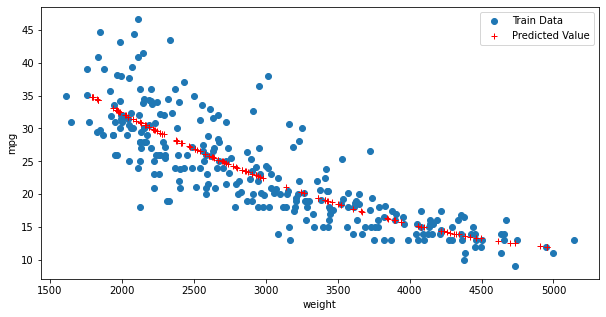

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [25]:
# 모델 전체 X 데이터 입력, 예측한 값 y_hat을 실제값 y와 비교

In [26]:
poly.fit_transform(X)

array([[1.0000000e+00, 3.5040000e+03, 1.2278016e+07],
       [1.0000000e+00, 3.6930000e+03, 1.3638249e+07],
       [1.0000000e+00, 3.4360000e+03, 1.1806096e+07],
       ...,
       [1.0000000e+00, 2.2950000e+03, 5.2670250e+06],
       [1.0000000e+00, 2.6250000e+03, 6.8906250e+06],
       [1.0000000e+00, 2.7200000e+03, 7.3984000e+06]])

In [27]:
X_poly = poly.fit_transform(X)
pr.predict(X_poly)

array([18.45440631, 17.22356356, 18.92530048, 18.94641711, 18.83412892,
       13.87411583, 13.82071301, 13.99520025, 13.53862447, 16.28831139,
       18.05786362, 17.75644752, 16.80877193, 21.58385112, 28.2267061 ,
       23.75048064, 24.28528932, 26.05420015, 30.84955625, 34.3011091 ,
       25.23623329, 27.62601841, 28.1953712 , 29.69934414, 25.46483872,
       12.86333807, 13.73157496, 13.70753425, 12.50515851, 30.84955625,
       29.37400481, 29.76475872, 31.80392196, 25.59904582, 18.90421273,
       19.69632238, 19.89668667, 20.00150061, 14.44708205, 13.39056043,
       14.70232675, 14.98201391, 11.94417544, 12.46524323, 11.5999412 ,
       22.62008082, 27.8525942 , 20.04661349, 21.15600423, 29.85215792,
       30.92822156, 31.48328321, 31.58607119, 35.06204818, 37.08277619,
       34.3132844 , 32.86337985, 29.22316855, 30.8944886 , 29.48213023,
       27.8525942 , 29.78658926, 14.15794925, 13.69555723, 14.79275901,
       14.82155733, 17.35466096, 12.80537318, 13.25098952, 13.42

In [28]:
y_hat = pr.predict(X_poly)

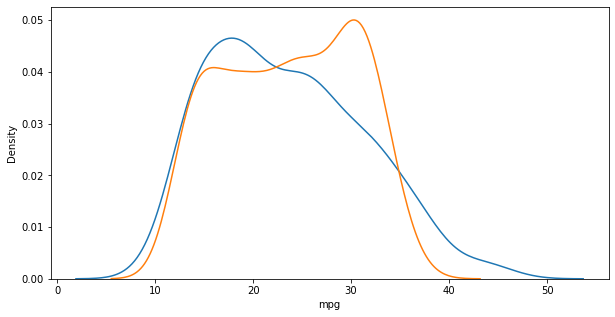

In [29]:
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.show()